In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data as load_mnist

In [2]:
mnist =  load_mnist()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = mnist

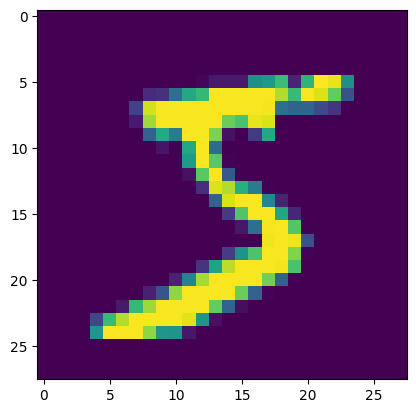

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]);

In [21]:
leNet5_original = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28,28, 1)), # Change input shape to 28x28
        tf.keras.layers.Rescaling(scale=1./255),
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation="tanh"),
        tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation="tanh"),
        tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=120, activation="tanh"), # The flattened output shape will now match the expected input for this layer
        tf.keras.layers.Dense(units=84, activation="tanh"),
        tf.keras.layers.Dense(units=10, activation="softmax")
     ]
)

In [22]:
leNet5_original.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="sgd",
    metrics=["accuracy"]
)

In [23]:
leNet5_original.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Expand dimensions to include the channel dimension for the original data
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)


ln5_original_model = leNet5_original.fit(x_train_expanded, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9564 - loss: 0.1420 - val_accuracy: 0.9639 - val_loss: 0.1248
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9632 - loss: 0.1240 - val_accuracy: 0.9688 - val_loss: 0.1125
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9682 - loss: 0.1105 - val_accuracy: 0.9725 - val_loss: 0.0988
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9711 - loss: 0.0987 - val_accuracy: 0.9741 - val_loss: 0.0927
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9756 - loss: 0.0880 - val_accuracy: 0.9766 - val_loss: 0.0845
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9773 - loss: 0.0787 - val_accuracy: 0.9778 - val_loss: 0.0774
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9785 - loss: 0.0746 - val_accuracy: 0.9797 - val_loss: 0.0738
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9795 -

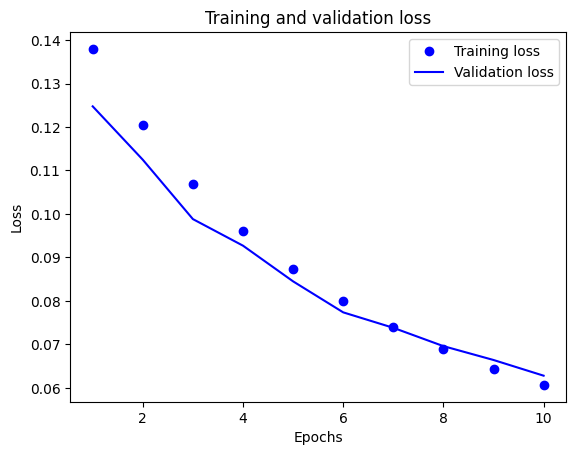

In [27]:
history_dict = ln5_original_model.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
leNet5_updated = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28,28, 1)), # Change input shape to 28x28
        tf.keras.layers.Rescaling(scale=1./255),
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation="relu"),
        tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation="relu"),
        tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=120, activation="relu"), # The flattened output shape will now match the expected input for this layer
        tf.keras.layers.Dense(units=84, activation="relu"),
        tf.keras.layers.Dense(units=10, activation="softmax")
     ]
)


leNet5_updated.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

# In cazul in care avem 3 epoci consecutive cu valori in directia gresita, opreste antrenare

In [29]:
stop_in_3_steps_callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)]

In [30]:
leNet5_updated.fit(x_train_expanded, y_train, epochs=10, validation_split=0.2, callbacks=stop_in_3_steps_callback)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8486 - loss: 0.5002 - val_accuracy: 0.9698 - val_loss: 0.0937
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9726 - loss: 0.0909 - val_accuracy: 0.9787 - val_loss: 0.0716
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9805 - loss: 0.0641 - val_accuracy: 0.9826 - val_loss: 0.0586
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9848 - loss: 0.0491 - val_accuracy: 0.9828 - val_loss: 0.0565
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9858 - val_loss: 0.0530
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9874 - val_loss: 0.0502
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9922 -

In [33]:
leNet5_original.evaluate(x_test_expanded, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0685


[0.05922670289874077, 0.982200026512146]

In [34]:
leNet5_updated.evaluate(x_test_expanded, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9883 - loss: 0.0387


[0.031137805432081223, 0.9907000064849854]